In [20]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

ħ = 1.0
ω_1 = ω_2 = 1.0
Ω_12 = 0.1
Γ = 1.0
C_12 = 0.8 * Γ

N_th = 0.1
r = 0.5
ϕ = 0.5

N_eff = N_th * (np.cosh(r)**2 + np.sinh(r)**2) + np.sinh(r)**2
M = -0.5 * np.sinh(2 * r) * np.exp(1j * ϕ) * (2 * N_th + 1)

sm_1 = qt.tensor(qt.sigmam(), qt.qeye(2))
sm_2 = qt.tensor(qt.qeye(2), qt.sigmam())
sp_1 = sm_1.dag()
sp_2 = sm_2.dag()

sz_1 = qt.tensor(qt.sigmaz(), qt.qeye(2)) / 2
sz_2 = qt.tensor(qt.qeye(2), qt.sigmaz()) / 2

# Hamiltonian
H = ħ * (ω_1 * sz_1 + ω_2 * sz_2) + ħ * Ω_12 * (sp_1 * sm_2 + sp_2 * sm_1)

C = np.array([[Γ, C_12],
              [C_12, Γ]])

sp = [sp_1, sp_2]
sm = [sm_1, sm_2]

def D(A, B, rho):
    return 2 * A * rho * B - B * A * rho - rho * B * A

def L_total(rho):
    L = 0
    for i in range(2):
        for j in range(2):
            cij = C[i][j]
            L += (cij / 2) * (1 + N_eff) * D(sm[j], sp[i], rho)
            L += (cij / 2) * N_eff * D(sp[j], sm[i], rho)
            L += (cij / 2) * M * D(sm[j], sm[i], rho)
            L += (cij / 2) * np.conj(M) * D(sp[j], sp[i], rho)
    return L

ρ_0 = qt.tensor(qt.basis(2,1), qt.basis(2,1)) * qt.tensor(qt.basis(2,1), qt.basis(2,1)).dag()

tlist = np.linspace(0, 10, 200)

ρ_t = []

ρ = ρ_0
dt = tlist[1] - tlist[0]

for t in tlist:
    ρ_t.append(ρ)
    dρdt = -1j * (H * ρ - ρ * H) + L_total(ρ)
    ρ = ρ + dt * dρdt

print(ρ_t[-1])  # ρ(t) at final time point

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 0.0655675 +0.j          0.        +0.j          0.        +0.j
   0.0188602 -0.07482805j]
 [ 0.        +0.j          0.18085644+0.j         -0.03851293+0.j
   0.        +0.j        ]
 [ 0.        +0.j         -0.03851293+0.j          0.18085644+0.j
   0.        +0.j        ]
 [ 0.0188602 +0.07482805j  0.        +0.j          0.        +0.j
   0.57271961+0.j        ]]


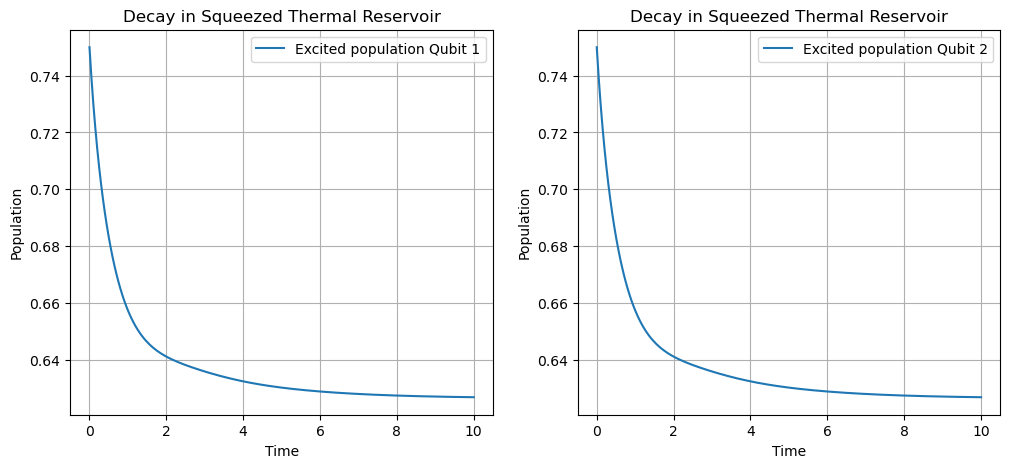

In [28]:
exp_e1 = [qt.expect(sz_1, r) for r in ρ_t]
exp_e1 = 0.5 * (1 - np.asarray(exp_e1))

exp_e2 = [qt.expect(sz_2, r) for r in ρ_t]
exp_e2 = 0.5 * (1 - np.asarray(exp_e2))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(tlist, exp_e1, label='Excited population Qubit 1')
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Decay in Squeezed Thermal Reservoir")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(tlist, exp_e2, label='Excited population Qubit 2')
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Decay in Squeezed Thermal Reservoir")
plt.grid()
plt.legend()

plt.show()

In [3]:
ω = 123
print(ω)

123
